# LOGISTIC REGRESSION

## 1. Logistic Function

#### 1.1 Problem
Predict y given x. (y is binary value).

#### 1.2 Idea
Có thể sử dụng Liner Regression để dự đoán giá trị y. Tuy nhiên, y chứa giá trị y ∈ {0, 1}. Vì vậy, sử dụng Sigmoid Function để dự đoán giá trị y

#### 1.3 Function
\begin{align}
\mathbf{h}_θ(x)=g(θ^{T})
\end{align}
\begin{align}
z = θ^{x}x
\end{align}
\begin{align}
g(z) = \frac{1}{1+e^{-z}}
\end{align}

Trong đó : 
* g(z) là hàm Sigmoid Function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

#### 1.5 Đồ thị Sigmoid Function

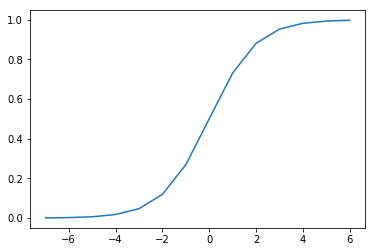

In [3]:
x = np.arange(-7, 7)
y = [sigmoid(i) for i in x]
plt.plot(x,y)

## 2 Data Sample

* Cho tập X : Thời gian học của mỗi sinh viên, có giá trị từ 0 -> 100 giờ
* Tập Y : Kết quả đậu và rớt. Với 0 : Rớt, 1 : Đậu

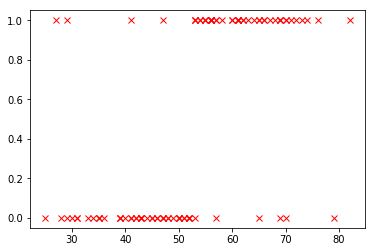

In [4]:
# Cho tập X là thời gian học, Y là kết quả {0,1} <=> {đậu, rớt} của sinh viên
X = np.random.normal(loc=50, scale=15, size = 100).round()
Y = [int(i>np.mean(X)) for i in X]

# Tao Outlier khoang 10%
outlier = np.random.randint(0, 100, 10)
for i in outlier:
    Y[i] = 1 - Y[i]
    
plt.plot(X,Y, 'rx')

## 3 Cost Function











\begin{equation*}
J(θ) = \frac{1}{m} \sum_{i=0}^m Cost(\mathbf{h}_θ(x^i)), y^i)
\end{equation*}

Trong đó : 
* y = 1
\begin{equation*}
Cost(\mathbf{h}_θ(x), y) = - log(\mathbf{h}_θ(x))
\end{equation*}

* y = 0
\begin{equation*}
Cost(\mathbf{h}_θ(x), y) = - log(1 - \mathbf{h}_θ(x)))
\end{equation*}

#### Tổng quát - Cost function 
\begin{equation*}
Cost(\mathbf{h}_θ(x))=\frac{-1}{m} \sum_{i=0}^m[y^i*log(\mathbf{h}_θ)) + (1-y^i)*log(1-\mathbf{h}_θ(x^i)]
\end{equation*}

#### Ý tưởng : 
* y = 1. Tính tổng toàn bộ các giá trị có y = 1 mà dự đoán = 0
* y = 0. Tính tổng toàn bộ các giá trị có y = 0 mà dự đoán = 1

#### 1.4 Decision Boundary
* h(x) >= 0.5 → y = 1
* h(x) <  0.5 → y = 0

Tuy nhiên
g(z) >= 0.5 khi z >= 0

#### Ask :
1. Tại sao không sử dụng Cost Function như Liner Regression.
2. Phương pháp thay thế cho Cost Function là gì?
3. Xử lý sao khi Log(0) = Nan

#### Ans : 
1. Bởi hàm cost function sẽ không Convex, vì vậy không sử dụng đạo hàm để tìm giá trị nhỏ nhất được
2. Sử dụng Log. Log của 1 Function Log(h0) hoặc Log(1-h0) luôn trả về 1 đồ thị Convex.
3. Do Log(0) ~ -vô cùng nên đặt Log(0) = 0

In [5]:
def cost_function(x, y, Theta0, Theta1):
    m = len(x)
    J_Theta = 0
    
    for i in range(m):
        H_Theta = sigmoid(Theta0 * x[i] + Theta1)
        J_Theta = (y[i]) * np.log(H_Theta) + (1 - y[i]) * np.log(1-H_Theta)
    J_Theta = -J_Theta/m
    
    return J_Theta

# 4. Gradient and Training

* Tối ưu Theta
\begin{equation*}
\mathbf{θ}_j:= \mathbf{θ}_j−\frac{α}{m}*\sum_{i=1}^m(\mathbf{h}_θ - y^i)x^i
\end{equation*}

* Ví dụ :  Tình huống θ chỉ chứa 2 biên [θ0, θ1], ta có : 
\begin{equation*}
\mathbf{θ}_0 = \mathbf{θ}_0 - \frac{α}{m}*\sum_{i=1}^m(\mathbf{h}_θ - y^i)x^i
\end{equation*}

\begin{equation*}
\mathbf{θ}_1 = \mathbf{θ}_0 - \frac{α}{m}*\sum_{i=1}^m(\mathbf{h}_θ - y^i)
\end{equation*}

In [6]:
def gradien(x, y, theta0, theta1, have_x):
    gradien_value_have_x, gradien_value_not_have_x = 0, 0
    m = len(x)
   
    for i in range(m):
        H_theta = sigmoid(theta0 * x[i] + theta1)
        gradien_value_have_x += (H_theta - y[i]) * x[i]
        gradien_value_not_have_x += (H_theta - y[i])
    
    if(have_x):
        return gradien_value_have_x
    return gradien_value_not_have_x

def training(x, y, epoch, learning_rate):
    theta0 = 1
    theta1 = 1
    cost_values = []
    m = len(x)
    
    for i in range(epoch):
        tmp_t0 = theta0
        theta0 -= (learning_rate/m) * gradien(x, y, theta0, theta1, True)
        theta1 -= (learning_rate/m) * gradien(x, y, tmp_t0, theta1, False)
        cost_values.append(cost_function(x, y, theta0, theta1))
    
    return {'Theta' : [theta0, theta1], 'cost' : cost_values}

# 5. Predict

C:\Users\lucnm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\lucnm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


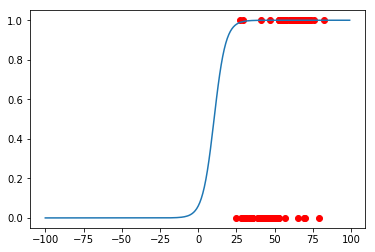

In [7]:
theta = training(X, Y, epoch=5000, learning_rate=0.01)['Theta']

x_sigmoid = range(-100, 100)
y_sigmoid = [sigmoid(theta[0] * x + theta[1]) for x in x_sigmoid]

plt.plot(X, Y, 'ro')
plt.plot(x_sigmoid, y_sigmoid)

# BUG

Function Predict không đựa ra kết quả đúng.

#### Nguyên nhân : 
* Đạo hàm của Sigmoid có giá trị rất nhỏ, gần như = 0 khi x nằm ngoài khoảng (-4, 4)

#### Giải pháp :
* Chuẩn hóa NOrmalization tập data về [-1, 1]


# 6. Normalization

\begin{equation*}
Z=\frac{x-μ}{σ}
\end{equation*}

### 6.1 Normalization Data

In [10]:
def normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    Normalized = [(x - mean) / std for x in X]
    
    return Normalized

### 6.2 Training in normalization data

In [11]:
# Step 1 : Normalization data
X_Normalized = normalization(X)

# Step 2 : Training from normalized data
Trained_resuilt = training(X_Normalized, Y, epoch = 10000, learning_rate=0.01)

theta, cost = Trained_resuilt['Theta'], Trained_resuilt['cost']

print('Theta0 = '+str(theta[0]) + 'Theta1 = '+str(theta[1]))

Theta0 = 1.7485358493612695Theta1 = -0.07960224873733567


### 6.3 Predict from Trained Data

\begin{equation*}
\frac{1}{1 + e^(1.8435 * x + 0.3344)}
\end{equation*}

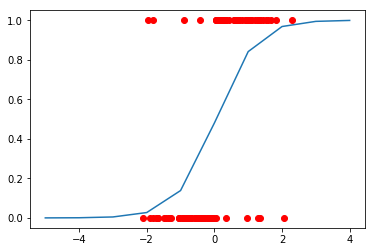

In [12]:
x_sigmoid = range(-5, 5)

# Create y_sigmoid with x have values in [-5. 5]
y_sigmoid = [sigmoid(theta[0] * x + theta[1]) for x in x_sigmoid]

plt.plot(X_Normalized, Y, 'ro')
plt.plot(x_sigmoid, y_sigmoid)

### 6.4 Cost Values

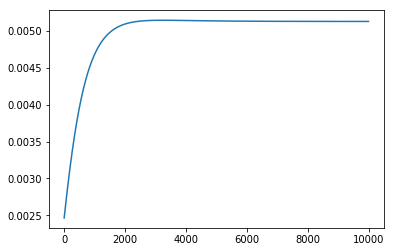

In [13]:
plt.plot(cost)

## 7. Improve Code

In [14]:
# Step 1 : Create data sample have type like : [x0, x1] with x1 value is 1

m_X = np.matrix([list(X), list(np.ones(len(X)))])
m_theta = np.matrix([1,1])

def cost_1(x, y, theta):
    m = x.shape[1]
    return (-1/m) * np.sum(y.T * np.log(sigmoid(x * theta.T)) + (1-y) * np.log(1 - sigmoid(x * theta.T)))

def trainning_1(x, y, epoch, alpha):
    _theta = np.matrix([1, 1])
    _train = 0
    _cost = []
    while(_train<5000):
        for i in range(len(theta)):
            _theta[i] -= (0.001/100)*np.sum(np.dot((sigmoid(x.dot(np.transpose(_theta))) - y), x.T[i]))
            _cost.append(cost_1(x, y, theta))
        _train += 1

    return theta

In [18]:
_theta = np.matrix([1, 1])
Y_bar = np.log(sigmoid(X_bar * _theta.T)).T 

NameError: name 'X_bar' is not defined

In [19]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 0)

ones = np.ones((X_Normalized.shape[0], 1))
X_bar = np.concatenate((X_Normalized.reshape(X_Normalizedshape[0], 1), ones), axis = 1)

Y_bar = np.array(Y).reshape(np.array(Y).shape[0], 1)

theta_imporved = trainning_1(X_bar, Y_bar, 1000, 0.001)

ValueError: all the input arrays must have same number of dimensions

In [20]:
x_sigmoid = range(-5, 5)

# Create y_sigmoid with x have values in [-5. 5]
y_sigmoid = [sigmoid(theta_imporved[0] * x + theta_imporved[1]) for x in x_sigmoid]

plt.plot(X_Normalized, Y, 'ro')
plt.plot(x_sigmoid, y_sigmoid)

NameError: name 'theta_imporved' is not defined

In [21]:
theta_imporved

NameError: name 'theta_imporved' is not defined

## 7. Use Sklearn for Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
def train2():
    theta = np.ones((2, 1))
    m = len(X)
    x0 = X - 50
    x1 = np.ones(m)
    x = np.array(list(zip(x0, x1)))
    print(x.shape)
    y = np.expand_dims(np.array(Y), axis=-1)
    print(y.shape)
    for i in range(500):
        h = sigmoid(np.dot(x, theta))
        z = h - y
        theta -= 0.001/m * np.dot(np.transpose(x), z)
    return theta

train2()

(100, 2)
(100, 1)


array([[0.29298793],
       [0.93251376]])

## 8. Khảo sát sự biến thiên của Sigmoid

Function Z in Sigmoid function must be like : 
Z = theta0 * x + theta1.

Nếu không có theta1, hàm Sigmoid sẽ đạt giá trị tại Y = 0.5 với X = 0

In [25]:
def sigmoid_1 (x, theta0, theta1):
    temp = 1.0/(1.0 + np.exp(-1.0 * (theta0*x + theta1)))
    return temp

### 8.1 Tình huống 1. 
* Theta0 = 0.1
* Theta1 = 0

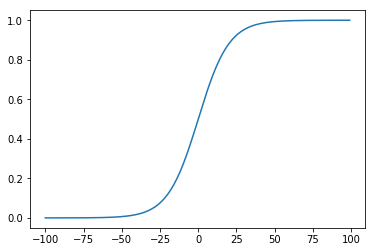

In [26]:
x_temp = range(-100, 100)

y_temp = [sigmoid_1(x_i, 0.1, 0) for x_i in x_temp]
plt.plot(x_temp, y_temp)

### 8.2 Tình huống 2
* Theta0 = 0.7
* Theta1 = 0

Đồ thị đạt Y = 0.5 tại X = 0.
Với Theta0 gần tiến tới 1, đồ thị hẹp hơn so với 0.3

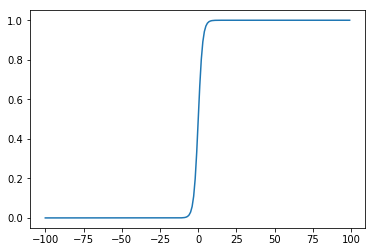

In [27]:
y_temp = [sigmoid_1(x_i, 0.7, 0) for x_i in x_temp]
plt.plot(x_temp, y_temp)

### 8.3 Tình huống 3
* Theta0 = 0.7
* Theta1 = 50

Đồ thị dịch qua trái 50 đơn vị

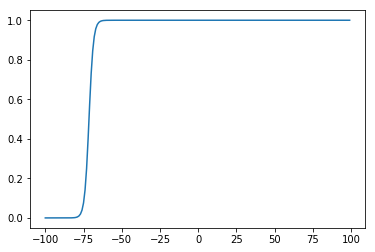

In [28]:
y_temp = [sigmoid_1(x_i, 0.7, 50) for x_i in x_temp]
plt.plot(x_temp, y_temp)

### 8.4 Tình huống 4
* Theta0 = 0.7
* Theta1 = 50

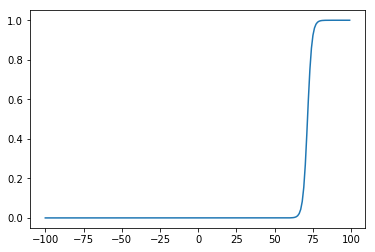

In [29]:
y_temp = [sigmoid_1(x_i, 0.7, -50) for x_i in x_temp]
plt.plot(x_temp, y_temp)

## 9. Gradient

In [30]:
x = range(0, 100)
y = np.sin(x)

In [31]:
y_gradient = np.cos(x)

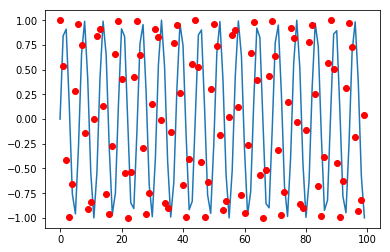

In [32]:
plt.plot(x,y)
plt.plot(x, y_gradient, 'ro')